In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

### zad3
Na postawie danych z zadania 2 (zmienna objaśniająca) i danych z zadania 3 (zmienna objaśniana) wyznacz prostą regresji na podstawie metody najmniejszych kwadratów. Wykonaj
to samo zadanie dla zmiennej objaśniającej, która została wygładzona za pomocą znanych
metod. Wykonaj odpowiednie wykresy.


In [2]:
df1 = pd.read_csv('data_ex2.txt')
df2 = pd.read_csv('data_ex3.txt')

x = df1['data'].values.tolist()
y = df2['y'].values.tolist()

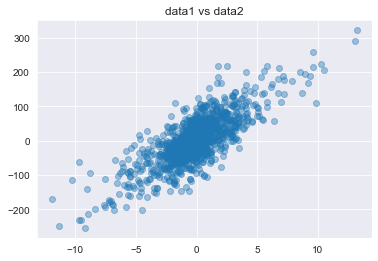

In [73]:
plt.scatter(x, y, alpha = 0.4)
plt.title('data1 vs data2')
plt.show()

In [80]:
def MNK(x,y):
    """Use Least Squares Method for data x and y to return line coefficients
    
    @param1 x: list of int/floats with length of n
    @param2 y: list of int/floats with length of n
    @return b0, b1: int/floats line coefficients"""
    
    avg_x = np.mean(x)
    avg_y = np.mean(y)

    n = len(x)
    up = sum([x[i]*(y[i]-avg_y) for i in range(n)])
    down = sum([(x[i]-avg_x)**2 for i in range(n)])
    b1 = up/down

    b0 = avg_y - b1*avg_x

    return b0, b1 
    

In [5]:
result = MNK(x,y)
b0 = result[0]
b1 = result[1]

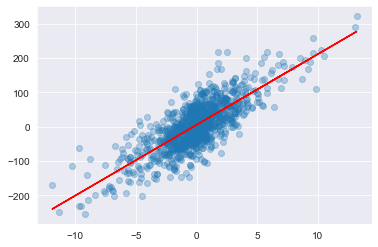

In [74]:
plt.scatter(x,y, alpha = 0.3)
plt.plot(x, np.polyval([b1,b0], x), color = 'red')
plt.show()

In [81]:
def cleaning(data, value):
    """Clean data using Moving Average Method
    
    @param1 data: list with int/float
    @param2 value: int. Must be an odd number
    @return cleaned_data: list/array/DataFrame"""
    
    n = len(data)

    if value % 2 != 1 :
        print('Input odd number to "value"')
        return False

    elif n < value:
        print('value is to big')
        return False
    
    cleaned_data = np.zeros(n)
    cleaned_data[0] = data[0]
    cleaned_data[n-1] = data[n-1]

    p = int((value - 1)/2)
    
    for i in range(n-p*2):
        cleaned_data[i+1] = (sum(data[i:i+p*2+1]))/value
        
    return cleaned_data

### Zad 4
Dla danych ze strony www wyznacz prostą regresji traktując pierwszą kolumnę jako zmienną objaśniającą, a drugą jako zmienną objaśnianą. Współczynniki prostej regresji wyznacz
wykorzystując metodę najmniejszych kwadratów. Następnie wyznacz residua (błędy). Zaproponuj swoją metodę wyznaczania obserwacji odstających. Usuń je, a następnie jeszcze raz
wyznacz prostą regresji.


In [28]:
df = pd.read_csv('data_ex4.txt', sep = '  ')

df.head()

x = df['x'].values.tolist()
y = df['y'].values.tolist()

<ipython-input-28-81193ca6f905>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('data_ex4.txt', sep = '  ')


### y^ = a^ xi +b^
a^ = $rS_y/S_x$

b^ = y_śr -ax_śr

ei = yi - a^*x_i -b^ 

In [25]:
mnk = MNK(x, y)
b0 = mnk[0]
b1 = mnk[1]

In [29]:
print(type(x))

<class 'list'>


In [83]:
def S(data):
    """Calculate S parameter for data
    
    @param1 data: list of int/floats
    @return result: float. Thats S parametr"""

    n = len(data)
    data_mean = np.mean(data)
    result = np.sqrt(sum([(i-data_mean)**2 for i in data])/(n-1))
    
    return result

def r(data_x, data_y):
    """Calculate r parameter from data_x and data_y
    
    @param1 data_x: list with lenght of n
    @param2 data_y: list with length of n
    @return result: float. Thats r parameter """
    
    x_mean = np.mean(data_x)
    y_mean = np.mean(data_y)
    
    n = len(data_x)

    summation = 0
    for i in range(n):
        summation += (data_x[i] - x_mean) * (data_y[i] - y_mean)
    
    result = summation/((n-1)*(S(data_x)*S(data_y)))
    return result


In [84]:
def ei(data_x, data_y):
    """Calculate ei parameter from data_x and data_y
    
    @param1 data_x: list with lenght of n
    @param2 data_y: list with length of n
    @return result: float. Thats ei parameter """

    n = len(data_x)
    Sx = S(data_x)
    Sy = S(data_y)
    re = r(data_x, data_y)
    
    a = re*Sy/Sx
    b = np.mean(data_y) - a * np.mean(data_x)
    result = [data_y[i] - a*data_x[i] - b for i in range(n)]
    
    return result

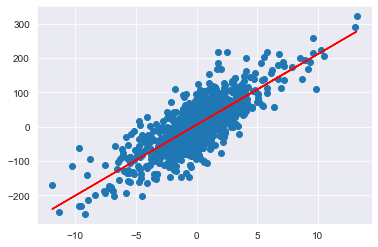

In [76]:
#First plot
plt.scatter(x, y)
plt.plot(x, np.polyval([b1,b0], x), color = 'red')
plt.show()

2


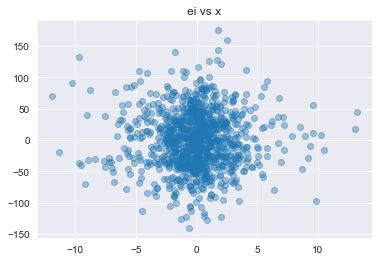

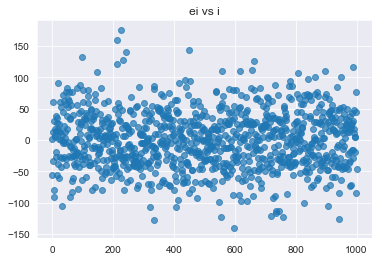

In [77]:
#second plot
ei_list = ei(x, y)

x_ei = np.linspace(0, len(ei_list), len(ei_list))
plt.scatter(x, ei_list, alpha= 0.4)
plt.title('ei vs x')
plt.show()
plt.scatter(x_ei, ei_list , alpha = 0.7)
plt.title('ei vs i')
plt.show()

In [55]:
ei_param = 2

ei_mean = np.mean(np.abs(ei_list))
print(ei_mean)
er_list_x = []
er_list_y = []

for i in range(len(ei_list)):
    if (ei_list[i] > ei_mean*ei_param) or (ei_list[i] < - ei_mean*ei_param):
        er_list_x.append(df['x'][i])
        er_list_y.append(df['y'][i])

36.691309618680926


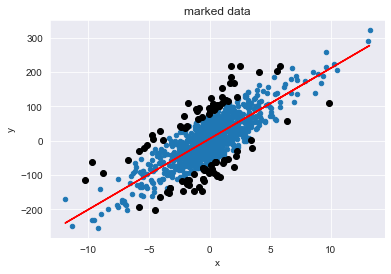

In [78]:
#third plot

df.plot(kind = 'scatter', x = 'x', y = 'y')
plt.scatter(er_list_x, er_list_y, color = 'black')
plt.plot(df['x'], np.polyval([b1,b0], df['x']), color = 'red')
plt.title('marked data')
plt.show()

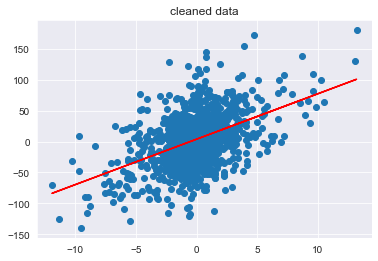

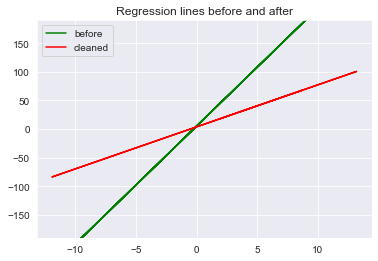

In [79]:
#forth plot
cleaned_y = cleaning(y, 3)
mnk_2 = MNK(x, cleaned_y)
b0_2 = mnk_2[0]
b1_2 = mnk_2[1]


plt.scatter(x, cleaned_y)
plt.plot(x, np.polyval([b1_2,b0_2], x), color = 'red')
plt.title('cleaned data')
plt.show()

plt.plot(x, np.polyval([b1,b0], x), color = 'green', label = 'before')
plt.plot(x, np.polyval([b1_2,b0_2], x), color = 'red', label = 'cleaned')
plt.ylim([-190, 190])
plt.title('Regression lines before and after')
plt.legend()
plt.show()
